<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/BP_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
print(np.__version__)

1.18.5


In [ ]:
my_arr = np.array([[50, 13, 21], [21, 34, 61]])
my_arr

array([[50, 13, 21],
       [21, 34, 61]])

In [ ]:
type(my_arr)

numpy.ndarray

In [ ]:
my_arr[1][2]

61

In [ ]:
np.sum(my_arr)

200

In [ ]:
import matplotlib.pyplot as plt

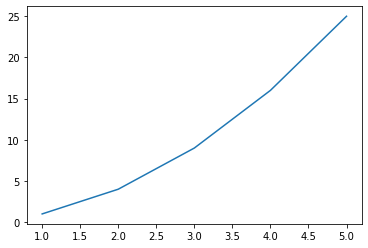

In [ ]:
 #선 그래프 그리기
 plt.plot([1, 2, 3, 4, 5],[1, 4, 9, 16, 25])

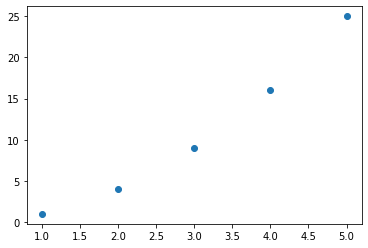

In [ ]:
 plt.scatter([1, 2, 3, 4, 5],[1, 4, 9, 16, 25])

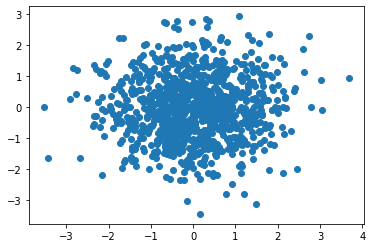

In [ ]:
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)

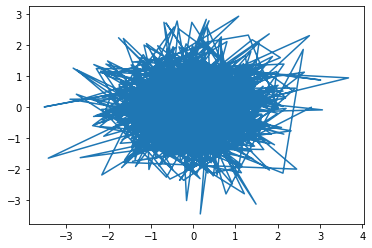

In [ ]:
plt.plot(x, y)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
#diabetes variable에 저장된 데이터는 dict와 유사한 형태를 가지는 bunch 클래스라고 함 x인 data와 y인 target이 따로 저장되어 있다.

In [ ]:
diabetes.data.shape
# feature 10개, example 442개

(442, 10)

In [ ]:
diabetes.target.shape

(442,)

In [ ]:
diabetes.data[:3]
# 그냥 diabetes[:3] 하면 에러남. 판다스 아니라서 head()는 당연히 안되고

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
diabetes.target[:3]

array([151.,  75., 141.])

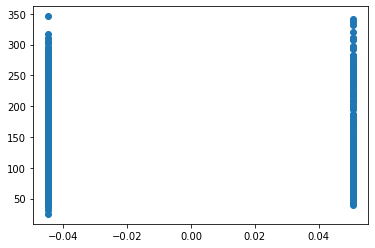

In [ ]:
# feature가 10개니까 2차원 그래프로는 표현할 수 없다. feature 한개만 뽑아서 그래프 그려보자
plt.scatter(diabetes.data[:, 1], diabetes.target) #[:][1} 이 아니라 [:, 1]
plt.show()

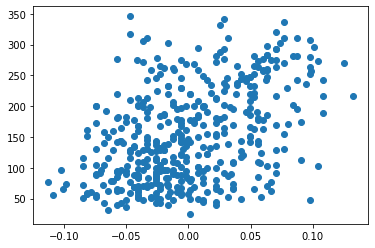

In [ ]:
# 다른 feature..
plt.scatter(diabetes.data[:, 3], diabetes.target)
plt.show()

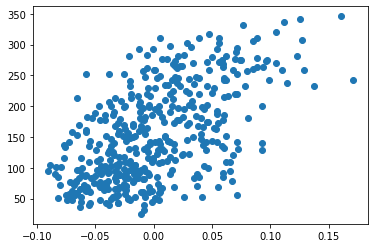

In [ ]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.show()

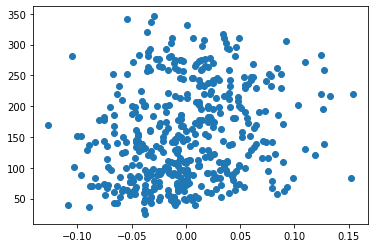

In [ ]:
plt.scatter(diabetes.data[:, 4], diabetes.target)
plt.show()

In [ ]:
# 제일 정비례관계가 명확한 [:, 2]로 진행

In [ ]:
x = diabetes.data[:, 2]
y = diabetes.target

In [ ]:
x.shape

(442,)

In [ ]:
# feature 가 한개인 x와 y로 모델을 만들어보자-!

In [ ]:
w = 1
b = 1
# 원래는 random initialization 해야겠죵

In [ ]:
y_hat = w * x[0] + b
y_hat

1.0616962065186886

In [ ]:
y[0]

151.0

In [ ]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc
# w를 증가시키니 y_hat 도 째끔 증가해서 151에 아주 조금 더 가까워졌다

1.0678658271705574

In [ ]:
# w가 0.1 증가했을 때 y_hat은 얼마나 증가했는지
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate
# 당연히 x[0]가 나온다. w가 변수고 x[0]이 상수가 된 꼴이니까

0.061696206518688734

In [ ]:
w_new = w + w_rate
w_new
# w_rate가 양수이므로 w에 w_rate를 더해주면 y_hat 증가. 반대로 w_rate 가 음수더라도 w에 w_rate를 더하면 (즉 빼면) y_hat 증가. 
# 어떤 경우든 w_rate를 더해주면 y_hat이 증가하는 방향으로 움직인다

1.0616962065186888

In [ ]:
# 똑같이 b도 업데이트 해주자

In [ ]:
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
y_hat_inc

1.1616962065186887

In [ ]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate
# b가 1만큼 증가할 때 y_hat도 1만큼 증가한다. 당연!

1.0

In [ ]:
b_new = b + b_rate
b_new

2.0

In [ ]:
# 오차역전파, 즉 y - y_hat 을 변화율에 곱하는 방법으로 파라미터를 업데이트 해보자
# 변화율만큼만 움직이는게 아니라 오차가 크면 업데이트 되는 범위도 크게 되도록 (변화율 * 오차)
# 또한 변화율만큼 움직이는 방법은 y_hat이 y보다 클 경우 y_hat이 감수가 되지 않는데 변화율에 오차를 곱해주면 알아서 - 값이 곱해지므로 그런 걱정을 할 필요가 없다.

In [ ]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
w_new, b_new
# w와 b가 엄청 많이 바뀌었다

(10.250624555904514, 150.9383037934813)

In [ ]:
# 업데이트 된 w_new와 b_new를 이용해서 두번째 example로 다시 업데이트 해보자
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_new = w_new + x[1] * err # x값이 w_rate인 것을 앞에서 확인했으므로
b_new = b_new + 1 * err
w_new, b_new

(14.132317616381767, 75.52764127612664)

In [ ]:
# 이 방식으로 example 전체를 돌려보자
for x_i, y_i in zip(x, y):
  y_hat_i = w * x_i + b
  err = y_i - y_hat_i
  w = w + x_i * err
  b = b + 1 * err
w, b

(587.8654539985689, 99.40935564531424)

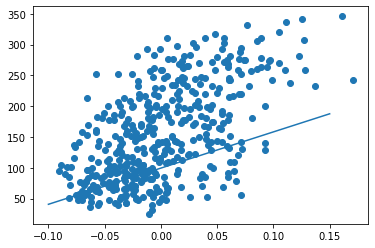

In [ ]:
# 제대로 됐는지 그래프를 그려볼까용
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]]) # 다시 풀어서 넣는 방법밖에 없나?

In [ ]:
# 성능을 향상시키기 위해 100 에포크를 돌려보자.
# 근데 지금 러닝레이트가 1인거나 마찬가지인데 이러면 마지막 example 으로 치우쳐지는거 아닌가? 흠..
w = 1
b = 1
for i in range(100):
  for x_i, y_i in zip(x, y):
    y_hat_i = w * x_i + b
    err = y_i - y_hat_i
    w = w + x_i * err
    b = b + 1 * err
w, b

(913.5973364345905, 123.39414383177204)

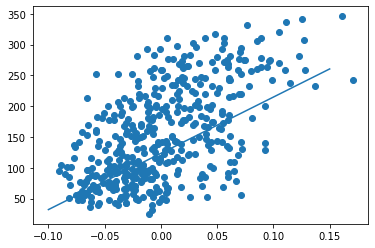

In [ ]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]])
# 아니네 마지막 example 에만 맞춰지는 거였으면 에포크를 몇번을 돌려도 결과값이 같아야 하는데